## YeLP Reviews Sentiment Analysis and Topic Modeling

In [1]:
DF_PATH = '../data/raw/yelp.csv'

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
import re
import nltk
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Read dataset

In [3]:
df = pd.read_csv(DF_PATH)
df.shape

(10000, 10)

### Display random raw

In [4]:
raw = df.sample(1).iloc[0]
raw

business_id                               nRO4tRwimU12hg7Cnz__iA
date                                                  2012-07-19
review_id                                 -mEYVhqc0ixr7mQOsLg1CA
stars                                                          4
text           Great meal all-around.  Was hoping for an auth...
type                                                      review
user_id                                   IfZShpNnoVXVGQXVQ3uDEg
cool                                                           0
useful                                                         0
funny                                                          0
Name: 9855, dtype: object

### See text review

In [5]:
raw['text']

'Great meal all-around.  Was hoping for an authentic experience...and that is what we received from start to finish.  Really enjoyed the grilled lamb and chicken, with garlic sauce on the side, and a Turkish coffee to finish.\n\nService was attentive and friendly.  The staff was clearly proud of their food/restaurant, as they should be...\n\nHighly recommend!'

### Check datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### Check null values

In [7]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

### Check duplication

In [8]:
df.duplicated().sum()

0

### Explore type column

In [9]:
df['type'].value_counts()

review    10000
Name: type, dtype: int64

### Explore date column

In [10]:
df['date'].max()

'2013-01-05'

In [11]:
df['date'].min()

'2005-04-18'

### Explore numeric columns

In [12]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


### Explore stars column

In [13]:
df['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

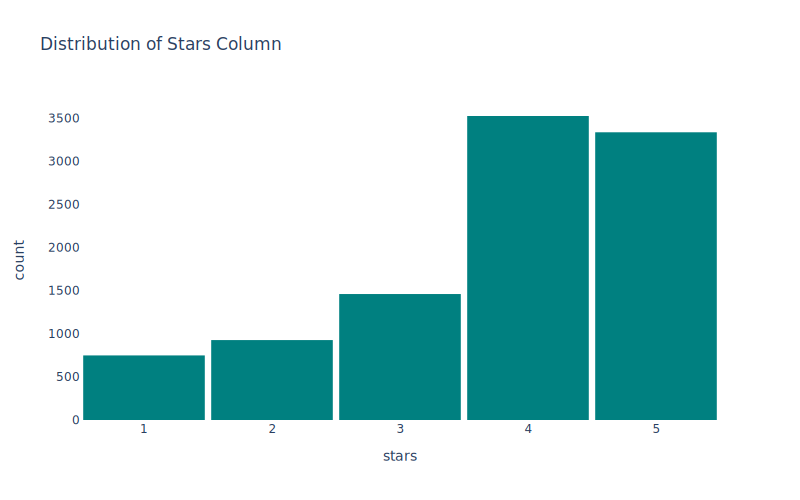

In [14]:
fig = px.histogram(df, x='stars', title='Distribution of Stars Column', color_discrete_sequence=['#008080'])
fig.update_layout(bargap=0.05, width=800, height=500, plot_bgcolor='#FFFFFF')
fig.show(renderer="svg")

### Explore text column length (YeLP Reviews Length)

In [15]:
df['text_length'] = df['text'].apply(len)

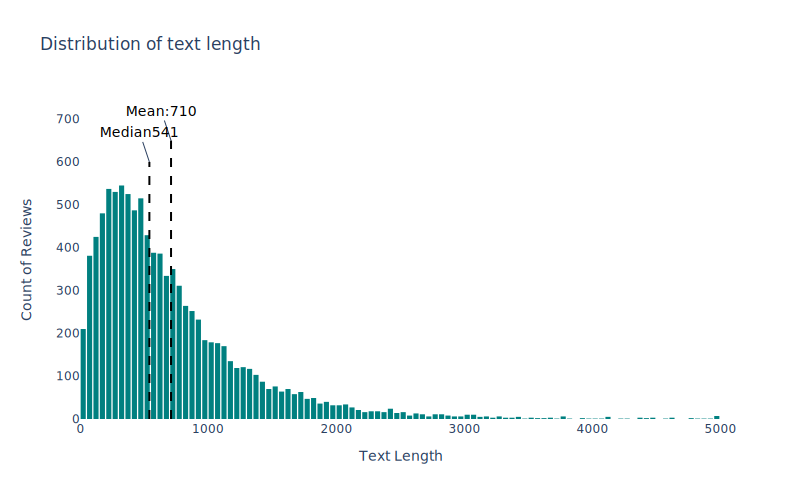

In [16]:
fig = px.histogram(df, x='text_length', title='Distribution of text length', color_discrete_sequence=['#008080'])
fig.update_layout(bargap=0.2, width=800, height=500, plot_bgcolor='#FFFFFF')
mean = df['text_length'].mean()
median = df['text_length'].median()
fig.add_shape(type='line', x0=mean, y0=0, x1=mean, y1=650, line=dict(color='black', width=2, dash='dash'))
fig.add_shape(type='line', x0=median, y0=0, x1=median, y1=600, line=dict(color='black', width=2, dash='dash'))
fig.add_annotation(x=mean, y=650, text=f'Mean:{int(mean)}', showarrow=True, font=dict(color='black', size=14))
fig.add_annotation(x=median, y=600, text=f'Median{int(median)}', showarrow=True, font=dict(color='black', size=14))
fig.update_xaxes(title = 'Text Length')
fig.update_yaxes(title = 'Count of Reviews')
fig.show(renderer="svg")

### Explore stars length

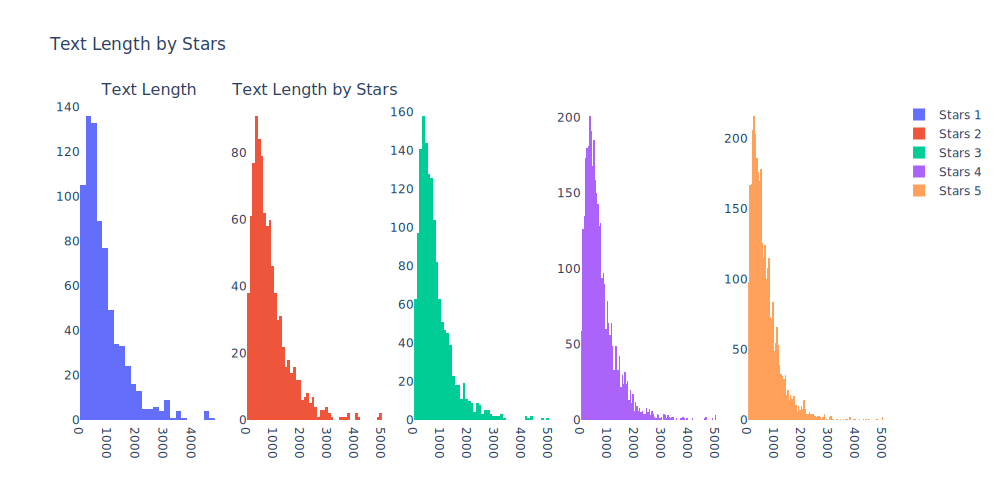

In [17]:
fig = make_subplots(rows=1, cols=5, subplot_titles=['Text Length', 'Text Length by Stars'])
for i in range(1, 6):
    subset = df[df['stars'] == i]
    fig.add_trace(go.Histogram(x=subset['text_length'], name=f'Stars {i}'), row=1, col=i)
fig.update_layout(height=500, width=1000, title_text='Text Length by Stars', plot_bgcolor='#FFFFFF')
fig.show(renderer="svg")

> **Conclusion:**
> 1. We will drop unneeded columns (business_id, date, review_id, type, user_id).
> 2. There is no missing values or duplicated rows.
> 3. Most of the reviews we have are positive reviews.